[-1.5327, -1.8808]
[ 3.2517,  1.7816]
[ 3.5976, -1.5752]
[-2.3240,  2.9935]
[-2.9926, -1.3191]


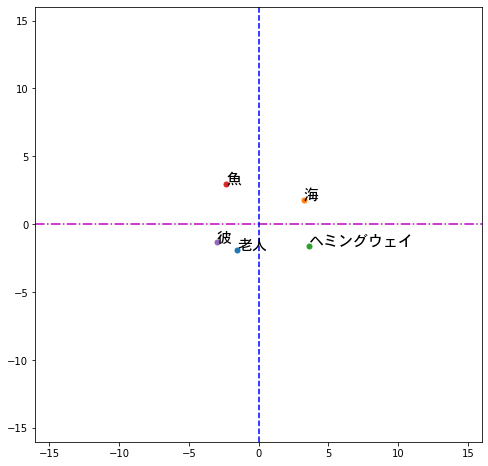

In [14]:
#AI-TECHGYM-1-12-A-2
#自然言語処理

#インポート
from gensim.models import word2vec
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

#PCA
from sklearn.decomposition import PCA

#フォントの準備
import urllib.request as req
url = "https://github.com/hokuto-HIRANO/Word2Vec/raw/master/font/Osaka.ttc"
req.urlretrieve(url, "./Osaka.ttc")

#フォントの指定
FONTPATH='./Osaka.ttc'
prop = font_manager.FontProperties(fname=FONTPATH)

#モデルの読み込み
model_path = './words.model'
model = word2vec.Word2Vec.load(model_path)

#対象の単語
words = []
words.append("老人")
words.append("海")
words.append("ヘミングウェイ")
words.append("魚")
words.append("彼")

vectors = []

for w in words:
    vectors.append(model.wv[w])

#単語のベクトル表現を2次元に圧縮する
pca = PCA(n_components=2)
pca.fit(vectors)
vectors_pca = pca.transform(vectors)

for w in vectors_pca:
    #配列形式に整形
    print(np.array2string(w, separator=', ', formatter={'float_kind': lambda x: '{: .4f}'.format(x)}))

# グラフの縦軸・横軸の目盛間隔を揃える
plt.figure(figsize = (8, 8))
plt.gca().set_xlim(-16, 16)
plt.gca().set_ylim(-16, 16)

#ブロットする
k = 0
while k < len(vectors_pca):
    #点プロット
    plt.plot(vectors_pca[k][0], vectors_pca[k][1], ms=5.0, zorder=2, marker="o")

    #文字プロット
    plt.annotate(words[k], (vectors_pca[k][0], vectors_pca[k][1]), fontproperties=prop, fontsize=15)
    # 引数に'xy=()'が省略されて'()'と書かれている

    k += 1

# plt.grid(color='k', linestyle='--', linewidth=0.5)

# y=0に水平線を引く
# plt.axhline(0, ls = "-.", color = "magenta")
plt.axhline(0, ls = "-.", color = "m")

# x=0に垂直線を引く
# plt.axvline(0, ls = "--", color = "navy")
plt.axvline(0, ls = "--", color = "b")

#グラフ表示
plt.show()


In [6]:
vectors

[array([-0.28423077, -0.0191811 ,  0.07614746,  0.77156097, -0.13954216,
        -0.42962068,  0.29137012,  1.147253  , -0.3061035 , -0.40496373,
         0.4531813 ,  0.15628302, -0.16024697, -0.05498756,  0.35076243,
         0.800787  ,  0.5123232 , -0.3031978 , -0.15382452,  0.19313197,
         0.00692609,  0.22325349,  0.49424782, -0.29600888, -0.04687403,
         0.02567292, -0.2025952 ,  0.32312515,  0.51407415,  0.08236296,
         0.16968201,  0.0062252 , -0.06742751, -0.28509825,  0.8376612 ,
         0.574183  ,  0.44728094, -0.62117916, -0.25741014, -0.23899397,
         0.23097439,  0.23786636, -0.24037974, -0.31928998,  0.08315112,
         0.59067774,  0.14671797, -0.3660547 ,  0.11961034, -0.27630574,
         0.37268355,  0.07549916, -1.3728201 ,  0.2506556 , -0.29554152,
        -0.092484  ,  0.59210515,  0.37592396, -0.21675085, -0.24201079,
         0.31566602,  0.5419648 , -0.02636378, -0.1952664 , -0.31025854,
        -0.12166317,  0.35065618,  0.29865587, -0.0

In [39]:
model.wv.n_similarity('老人', '海')

KeyError: "Key '老' not present"

In [34]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [89]:
sc = StandardScaler()
X_std = sc.fit_transform(cancer.data[:,0].reshape(-1,1))
print(X_std[:5])

[[ 1.09706398]
 [ 1.82982061]
 [ 1.57988811]
 [-0.76890929]
 [ 1.75029663]]


In [90]:
sc = StandardScaler()
X_std = sc.fit_transform(cancer.data)
print(X_std[:5])

[[ 1.09706398e+00 -2.07333501e+00  1.26993369e+00  9.84374905e-01
   1.56846633e+00  3.28351467e+00  2.65287398e+00  2.53247522e+00
   2.21751501e+00  2.25574689e+00  2.48973393e+00 -5.65265059e-01
   2.83303087e+00  2.48757756e+00 -2.14001647e-01  1.31686157e+00
   7.24026158e-01  6.60819941e-01  1.14875667e+00  9.07083081e-01
   1.88668963e+00 -1.35929347e+00  2.30360062e+00  2.00123749e+00
   1.30768627e+00  2.61666502e+00  2.10952635e+00  2.29607613e+00
   2.75062224e+00  1.93701461e+00]
 [ 1.82982061e+00 -3.53632408e-01  1.68595471e+00  1.90870825e+00
  -8.26962447e-01 -4.87071673e-01 -2.38458552e-02  5.48144156e-01
   1.39236330e-03 -8.68652457e-01  4.99254601e-01 -8.76243603e-01
   2.63326966e-01  7.42401948e-01 -6.05350847e-01 -6.92926270e-01
  -4.40780058e-01  2.60162067e-01 -8.05450380e-01 -9.94437403e-02
   1.80592744e+00 -3.69203222e-01  1.53512599e+00  1.89048899e+00
  -3.75611957e-01 -4.30444219e-01 -1.46748968e-01  1.08708430e+00
  -2.43889668e-01  2.81189987e-01]
 [ 1.5

In [49]:
#AI-TECHGYM-1-4-A-3
#教師なし学習 k-mean法

# データ加工・処理・分析ライブラリ
import pandas as pd
from pandas import Series, DataFrame

# 可視化ライブラリ
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# k-means法を使うためのインポート
from sklearn.cluster import KMeans

# データがあるurl の指定
file_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv'

# データを取得して展開する
#対象データを読み込み
shoppers= pd.read_csv(file_url)

# データの列の絞り込み
shoppers_sub = shoppers[['Administrative_Duration','Informational_Duration','ProductRelated_Duration','Region','SpecialDay']]

# KMeansクラスの初期化
kmeans = KMeans(init='random', n_clusters=6, random_state=0)

# クラスターの重心を計算
kmeans.fit(shoppers_sub)

# クラスター番号をpandasのSeriesオブジェクトに変換
labels = pd.Series(kmeans.labels_, name='cluster_number')

# 金融機関のデータにクラスター番号のデータを結合
shoppers_with_cluster = pd.concat([shoppers, labels], axis=1)

# 分割のための区切りを設定
bins = [0,0.2,0.4,0.6,0.8,1]

# 上の区切りをもとに金融機関のデータを分割し、qcut_age変数に各データの年齢層を設定
qcut_sp = pd.cut(shoppers_with_cluster.SpecialDay, bins, right=False)

# クラスタ番号と年齢層を結合
df = pd.concat([shoppers_with_cluster.cluster_number, qcut_sp], axis=1)

# クラスタ番号と年齢層を軸に集計し、年齢層を列に設定
cross_cluster_sp = df.groupby(['cluster_number', 'SpecialDay']).size().unstack().fillna(0)
display(cross_cluster_sp)

# 分割のための区切りを設定
bins_2 = [1,2,3,4,5,6,7,8,9]

# 上の区切りをもとに金融機関のデータを分割し、qcut_age変数に各データの年齢層を設定
qcut_r = pd.cut(shoppers_with_cluster.Region, bins_2, right=False, labels=[1,2,3,4,5,6,7,8])

# クラスタ番号と年齢層を結合
df = pd.concat([shoppers_with_cluster.cluster_number, qcut_r], axis=1)

# クラスタ番号と年齢層を軸に集計し、年齢層を列に設定
cross_cluster_r = df.groupby(['cluster_number', 'Region']).size().unstack().fillna(0)
display(cross_cluster_r)


SpecialDay,"[0.0, 0.2)","[0.2, 0.4)","[0.4, 0.6)","[0.6, 0.8)","[0.8, 1.0)"
cluster_number,,,,,
0,386,6,7,2,15
1,10,0,0,0,0
2,1096,9,28,26,20
3,2807,49,48,83,71
4,6657,114,159,240,218
5,123,0,1,0,1


Region,1,2,3,4,5,6,7,8
cluster_number,,,,,,,,
0,181,39,83,35,12,25,17,15
1,8,0,1,1,0,0,0,0
2,464,119,239,110,27,64,78,39
3,1145,302,616,302,79,212,207,120
4,2912,667,1444,727,196,500,453,260
5,70,9,20,7,4,4,6,0
